In [1]:
import pandas as pd
import numpy as np
import scipy
import random
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
symbols = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
def color_generator():
    color = '#'
    for i in range(6):
        index = 0
        for j in xrange(1000) :
            index = random.randint(0, 15)
        color += (symbols[index])
    return color

Сгенерируем выборку из стандартного распределения Коши. распределение Коши плохо тем, что имеет много выбросов!

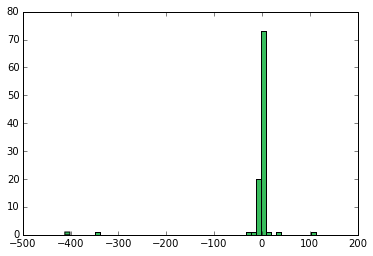

In [22]:
cauchy = scipy.stats.cauchy.rvs(size=100)
plt.hist(cauchy, bins = 50,color=color_generator())
plt.show()

Предположим, что у нас выборка из нормального распределения N($\theta$, 1)

In [23]:
sum(cauchy)

-678.35152793621751

$\theta \sim N(0, \frac{1}{16})$ Взяли априорное распределение таким, т.к. мы пользуемся правилом 2 сигм:
<img src="https://upload.wikimedia.org/wikipedia/commons/3/37/Standard_deviation_diagram_%28decimal_comma%29.svg">
Взяв матожидание $\theta$ нулевым, получим $P(0 - 2\sigma < \theta < 0 + 2\sigma) >= 0.95 $

А нам надо$ P(|{\theta}| < \frac{1}{2}) >= 0.95 .$ 2$\sigma = \frac{1}{2} \to \sigma = \frac{1}{4}$


... 10 minutes later ...
Считал интеграл вручную, получил оценку совпадающую с оценкой в задаче 7.1

$\hat{\theta} = \frac{\sum_{1}^{n}{X_{i}}}{n + 16}$

Напишем функцию, которая визуализириует нам нашу оценку
<ul>
    <li>Считаем массив частичных сумм</li>
    <li>Считаем $\hat{\theta}$</li>
    <li>Далее рисуем сам график</li>
<ul>

In [48]:
def draw_eval():
    selection = scipy.stats.cauchy.rvs(size=100)
    sumka = np.cumsum(selection)
    means = sumka
    for i in range(len(means)):
        means[i] = means[i] / float(i + 1)
    evals = [np.abs(sumka[i] / float(i + 1. + 16.)) for i in range(len(selection))]
    print sumka[-1]
    dots = range(1, len(selection) + 1)
    plt.plot(dots, map(abs, means), '--', color=color_generator(), label='MLE')
    plt.title('MLE evaluate for $\\theta$')
    plt.show()
    plt.plot(dots, evals, color=color_generator(), label='Bayes')
    plt.title('Bayes evaluate for $\\theta$')
    plt.show()

Оценкой максимального правдоподобия для N($\theta$, 1) - выборочное среднее

-0.414385767697


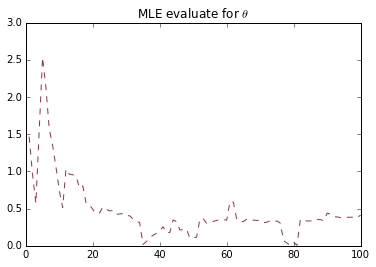

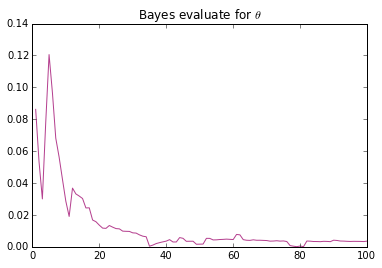

In [52]:
draw_eval()

Видим, что при неправильном угадывании распределения, мы получаем плохие оценки, а в случае ОМП очень плохую, которая сильно отличается от реального параметра $\theta$ При перегенерации выборок мы будем получать всегда разные результаты
В случае неверно угаданного распределения , мы видим, что Байесовская оценка выглядит намного лучше оценки максимального правдоподобия
